### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from pprint import pprint

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score


pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)

import warnings
warnings.filterwarnings("ignore")

import random
random.seed(5)

In [2]:
trainset = pd.read_csv('traincleaned.csv')
testset = pd.read_csv('testcleaned.csv')

In [3]:
trainset.shape

(1562, 9)

In [4]:
trainset.head()

,population,poverty_rate,pct_asian,pct_adults_bachelors_or_higher,death_rate_per_1k,pct_adult_obesity,pct_adults_with_high_school_diploma,pct_physical_inactivity,gross_rent
0,0.023278,0.163225,0.215669,0.415881,0.453269,0.515625,0.452178,0.733696,577.0
1,0.064244,0.301803,0.057134,1.000000,0.000000,0.218750,0.120183,0.030797,844.0
2,0.172656,0.382985,0.180185,0.477163,0.530341,0.442708,0.608543,0.429348,700.0
3,0.054635,0.537368,0.164462,0.464484,0.530151,0.229167,0.401060,0.487319,592.0
4,0.022019,0.321482,0.521310,0.414058,0.795009,0.588542,0.542461,0.726449,444.0


In [5]:
trainset.describe()

,population,poverty_rate,pct_asian,pct_adults_bachelors_or_higher,death_rate_per_1k,pct_adult_obesity,pct_adults_with_high_school_diploma,pct_physical_inactivity,gross_rent
count,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
mean,0.315221,0.470485,0.325477,0.420082,0.498212,0.489837,0.501116,0.498382,690.869398
std,0.337841,0.206988,0.322053,0.244388,0.187483,0.213047,0.185760,0.190813,161.102958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,351.000000
25%,0.065720,0.312640,0.091503,0.239495,0.375000,0.375000,0.379902,0.375000,578.000000
50%,0.161420,0.437152,0.202047,0.362974,0.497575,0.494792,0.516032,0.512681,650.000000
75%,0.439432,0.587584,0.454902,0.543697,0.625000,0.625000,0.633171,0.625000,773.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1067.375000


In [6]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 9 columns):
population                             1562 non-null float64
poverty_rate                           1562 non-null float64
pct_asian                              1562 non-null float64
pct_adults_bachelors_or_higher         1562 non-null float64
death_rate_per_1k                      1562 non-null float64
pct_adult_obesity                      1562 non-null float64
pct_adults_with_high_school_diploma    1562 non-null float64
pct_physical_inactivity                1562 non-null float64
gross_rent                             1562 non-null float64
dtypes: float64(9)
memory usage: 110.0 KB


In [7]:
X = trainset.iloc[:,0:8].values
y = trainset.iloc[:,8].values

In [8]:
X.shape, y.shape

((1562, 8), (1562,))

In [9]:
testset.shape

(1576, 8)

In [10]:
testset = testset.values

In [11]:
testset

array([[0.12841254, 0.05338035, 0.39032981, ..., 0.73768167, 0.19027042,
        0.52611141],
       [0.53829054, 0.5042044 , 0.8243051 , ..., 0.03530985, 0.92579809,
        0.32376536],
       [0.20147311, 0.21404344, 0.72501092, ..., 0.46018719, 0.27980005,
        0.47108826],
       ...,
       [0.06632096, 0.21715796, 0.10569026, ..., 0.        , 1.        ,
        0.        ],
       [0.06772453, 0.32619313, 0.44442879, ..., 0.54559827, 0.5963895 ,
        0.42888532],
       [0.00294918, 0.09121167, 0.11712994, ..., 0.49434356, 0.49655802,
        0.17502657]])

In [12]:
testset.shape

(1576, 8)

### Perform TTS

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [14]:
X_train.shape, y_train.shape

((1249, 8), (1249,))

In [15]:
X_test.shape, y_test.shape

((313, 8), (313,))

### Random Forest Test Model

In [16]:
rf = RandomForestRegressor(n_estimators=150,criterion='mae',max_depth=16, min_samples_split=2,
                           min_samples_leaf=2,max_features='auto',bootstrap=True,n_jobs=-1,random_state=5, verbose=1)

In [17]:
rfFit = rf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.3s finished


In [18]:
y_predict = rfFit.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished


In [19]:
y_predict[0:5]

array([495.32      , 724.06541667, 600.23333333, 766.62583333,
       703.19041667])

Text(0, 0.5, 'Predictions')

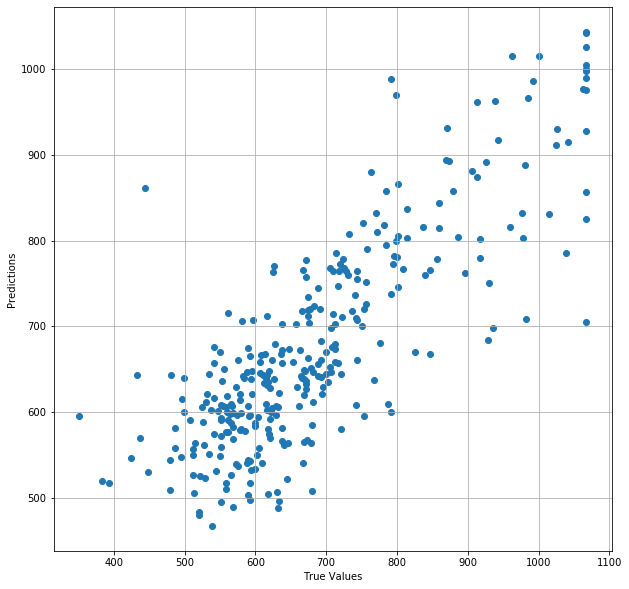

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_predict)
plt.grid()
plt.xlabel('True Values')
plt.ylabel('Predictions')

### Model Evaluation

In [21]:
rfFit.score(X_test,y_test)  #Returns R2 score

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished


0.6743739151799942

In [22]:
r2_score(y_test,y_predict,multioutput='variance_weighted')

0.6743739151799942

### Perform Cross-Validation

Cross-validation is another method to estimate the skill of a method on unseen data. Like using a train-test split.

Cross-validation systematically creates and evaluates multiple models on multiple subsets of the dataset.

This, in turn, provides a population of performance measures.

- We can calculate the mean of these measures to get an idea of how well the procedure performs on average.
- We can calculate the standard deviation of these measures to get an idea of how much the skill of the procedure is expected to vary in practice.

The train-test split and k-fold cross validation are called resampling methods. Resampling methods are statistical procedures for sampling a dataset and estimating an unknown quantity.

In the case of applied machine learning, we are interested in estimating the skill of a machine learning procedure on unseen data. More specifically, the skill of the predictions made by a machine learning procedure.

Once we have the estimated skill, we are finished with the resampling method.

- If you are using a train-test split, that means you can discard the split datasets and the trained model.
- If you are using k-fold cross-validation, that means you can throw away all of the trained models.

They have served their purpose and are no longer needed.

You are now ready to finalize your model.

When choosing a value for k each fold(group) should be large enough to be **representative** of the model (commonly k=10 or k=5) and small enough to be computed in a reasonable amount of time. Depending on the dataset size, different k values can sometimes be experimented with. As a general rule, as k increases, bias decreases and variance increases.

But the purpose of cross-validation is not to come up with our final model. We don't use these 5 instances of our trained model to do any real prediction. For that we want to use all the data we have to come up with the best model possible. The purpose of cross-validation is model checking, not model building.

In [23]:
r2score = cross_val_score(rfFit,X,y,cv=5,n_jobs=-1,scoring='r2')

In [24]:
r2score

array([0.68701587, 0.70626993, 0.67192355, 0.72467011, 0.67397319])

In [25]:
r2score.mean()

0.6927705278469178

In [26]:
r2score.std()

0.020104077258192077

In [ ]:
# Make cross validated predictions
#predictions = cross_val_predict(rfFit, X, y, cv=5)

In [ ]:
### Second Method

In [ ]:
num_folds = 5
seed = 5

kfold = KFold(n_splits=num_folds, random_state=seed)

In [ ]:
results = cross_val_score(rfFit,X,y,cv=kfold,n_jobs=-1)

In [ ]:
results  #Same as before

In [ ]:
### Third method but more details

In [ ]:
result2 = cross_validate(rfFit,X,y,cv=5,return_train_score=True)

In [ ]:
result2

In [ ]:
### Leave One Out Cross Validation (Warning take a long time)

In [ ]:
num_folds = 5
seed = 5
loocv = LeaveOneOut()

results3 = cross_val_score(rfFit,X,y,cv=loocv,n_jobs=-1)

### Using RandomGridSearch to tune hyperparameters

In [ ]:
base = RandomForestRegressor(n_estimators=10,criterion='mae',bootstrap=True, max_features='auto',n_jobs=-1,random_state=5)

In [ ]:
params = {'n_estimators' : [150,200],
          'max_depth':[8,16,24],
          'min_samples_leaf': [2, 4, 6]
         }

pprint(params)

In [ ]:
random = RandomizedSearchCV(base,params,n_iter=100,scoring='r2',n_jobs=-1,cv=4,verbose=1,random_state=5)

In [ ]:
random.fit(X,y)

In [ ]:
random.best_params_

### Using GridSearchCV to tune hyperparameters

In [ ]:
base = RandomForestRegressor(n_estimators=10,criterion='mae',bootstrap=True, max_features='auto',min_samples_leaf=2,n_jobs=-1,random_state=5)

In [ ]:
params = {'n_estimators' : [150,200],
          'max_depth':[8,16,24],
          'min_samples_split': [2, 4, 6]
         }

pprint(params)

In [ ]:
grid = GridSearchCV(base,params,scoring='r2',n_jobs=-1,cv=3,verbose=1,return_train_score=True)

In [ ]:
grid.fit(X,y)

In [ ]:
grid.best_params_

In [ ]:
#Best hyperparams: 
#bootstrap = True
#n_estimators = 150
#max_depth = 16
#max_features = 'auto'
#min_samples_leaf = 2
#min_samples_split = 2

### Select best model and train with all trainset data

In [27]:
rf = RandomForestRegressor(n_estimators=150,criterion='mae',max_depth=16, min_samples_split=2,
                           min_samples_leaf=2,max_features='auto',bootstrap=True,n_jobs=-1,random_state=5, verbose=1)

In [28]:
rfFit = rf.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.7s finished


In [29]:
y_predict = rfFit.predict(testset)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished


In [30]:
rfFit.score(X,y)  #Returns R2 score for training set

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished


0.8950751723282757

In [31]:
y_predict = y_predict.astype(int)

In [32]:
y_predict

array([648, 805, 837, ..., 806, 581, 717])

In [33]:
y_predict.shape

(1576,)

In [34]:
y_predict = np.reshape(y_predict,(-1,1))

In [35]:
y_predict

array([[648],
       [805],
       [837],
       ...,
       [806],
       [581],
       [717]])

In [36]:
rfFit.score(testset,y_predict)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished


0.9999444206938221

In [37]:
testresult = pd.DataFrame(y_predict.astype(int), columns=['gross_rent'])

In [38]:
testresult

,gross_rent
0,648
1,805
2,837
3,781
4,788
5,686
6,646
7,946
8,820
9,586


In [39]:
#testresult.to_csv("randomforest.csv",index_label=['row_id'])